In [1]:
import tensorflow as tf

print(tf.config.list_physical_devices('GPU'))

2025-01-30 19:00:03.594127: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738234803.643195  564038 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738234803.657620  564038 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-30 19:00:03.705806: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]


In [2]:
import deeplake

train_ds = deeplake.load("hub://activeloop/gtsrb-train", spinner=False)
test_ds = deeplake.load("hub://activeloop/gtsrb-test", spinner=False)

/home/moanish/.conda/envs/TensorFlow-GPU/lib/python3.9/site-packages/deeplake/util/check_latest_version.py:32: UserWarning: A newer version of deeplake (4.1.6) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(


Opening dataset in read-only mode as you don't have write permissions.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/gtsrb-train
hub://activeloop/gtsrb-train loaded successfully.
Opening dataset in read-only mode as you don't have write permissions.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/gtsrb-test
hub://activeloop/gtsrb-test loaded successfully.


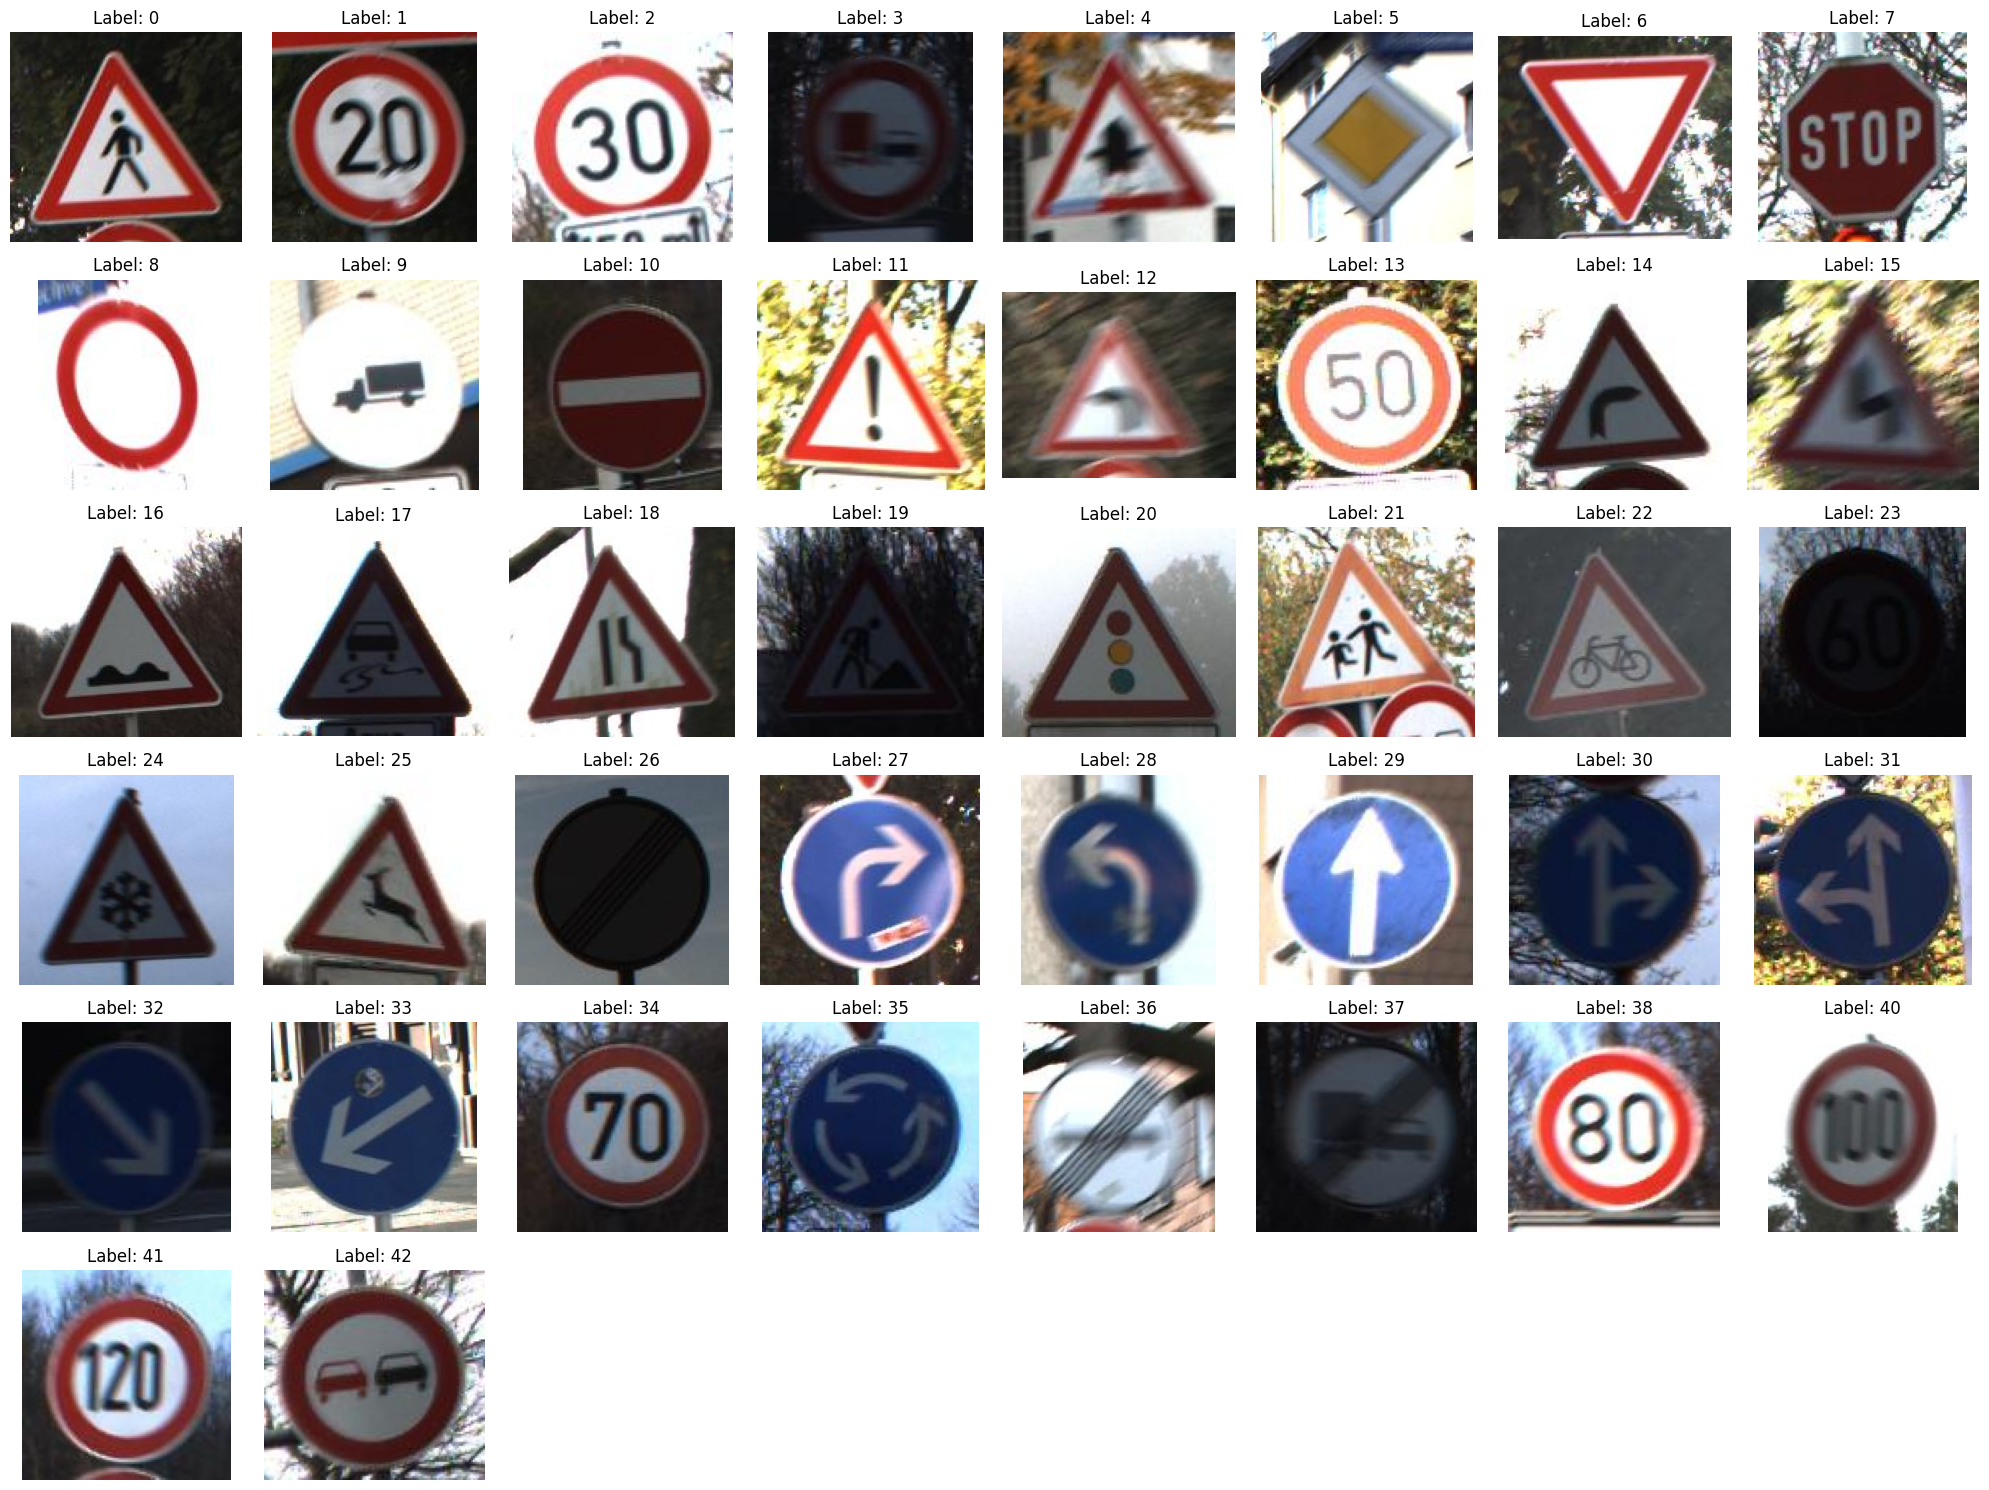

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Dictionary to store one high-resolution image for each label
high_res_images_per_label = {}

# Define resolution threshold
resolution_threshold = 100  # Minimum width and height

# Loop through the dataset to collect high-resolution images for each label
for sample in train_ds:
    label = sample['labels'].numpy().item()  # Convert to scalar
    image = sample['images'].numpy()
    height, width, _ = image.shape

    # Check if the image meets the resolution threshold
    if height > resolution_threshold and width > resolution_threshold:
        if label not in high_res_images_per_label:  # Add only one image per label
            high_res_images_per_label[label] = image
        if len(high_res_images_per_label) == 43:  # Stop once all 43 labels are covered
            break

# Sort high_res_images_per_label by label
sorted_high_res_images_per_label = dict(sorted(high_res_images_per_label.items()))

# Plot one high-resolution image per label in ascending order
fig, axes = plt.subplots(6, 8, figsize=(20, 15))  # Adjust grid size for 43 labels
axes = axes.flat

for ax, (label, image) in zip(axes, sorted_high_res_images_per_label.items()):
    ax.imshow(image)
    ax.set_title(f"Label: {label}")  # Show raw label number
    ax.axis('off')

# Hide any remaining unused subplots (if there are less than 43 valid images)
for ax in axes[len(sorted_high_res_images_per_label):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


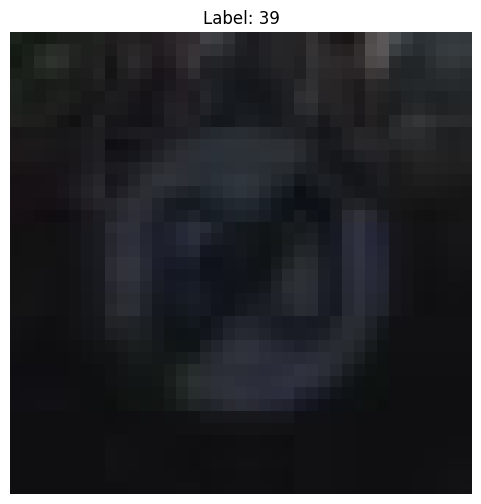

In [4]:
import matplotlib.pyplot as plt

# Find and display the image for label 39
label_to_display = 39
image_for_label = None

# Loop through the dataset to find the image with label 39
for sample in train_ds:
    label = sample['labels'].numpy().item()  # Convert to scalar
    if label == label_to_display:
        image_for_label = sample['images'].numpy()
        break  # Stop once the label is found

# Display the image if found
if image_for_label is not None:
    plt.figure(figsize=(6, 6))
    plt.imshow(image_for_label)
    plt.title(f"Label: {label_to_display}")
    plt.axis('off')
    plt.show()
else:
    print(f"Label {label_to_display} not found in the dataset.")

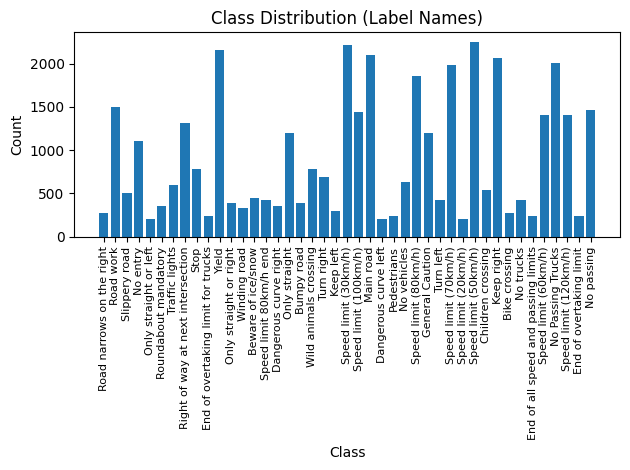

In [5]:
from collections import Counter
import matplotlib.pyplot as plt

# Define the label mapping (mames of the 43 classes)
label_mapping = {
    0: "Pedestrians",
    1: "Speed limit (20km/h)",
    2: "Speed limit (30km/h)",
    3: "No Passing Trucks",
    4: "Right of way at next intersection",
    5: "Main road",
    6: "Yield",
    7: "Stop",
    8: "No vehicles",
    9: "No trucks",
    10: "No entry",
    11: "General Caution",
    12: "Dangerous curve left",
    13: "Speed limit (50km/h)",
    14: "Dangerous curve right",
    15: "Winding road",
    16: "Bumpy road",
    17: "Slippery road",
    18: "Road narrows on the right",
    19: "Road work",
    20: "Traffic lights",
    21: "Children crossing",
    22: "Bike crossing",
    23: "Speed limit (60km/h)",
    24: "Beware of ice/snow",
    25: "Wild animals crossing",
    26: "End of all speed and passing limits",
    27: "Turn right",
    28: "Turn left",
    29: "Only straight",
    30: "Only straight or right",
    31: "Only straight or left",
    32: "Keep right",
    33: "Keep left",
    34: "Speed limit (70km/h)",
    35: "Roundabout mandatory",
    36: "End of overtaking limit",
    37: "End of overtaking limit for trucks",
    38: "Speed limit (80km/h)",
    39: "Speed limit 80km/h end",
    40: "Speed limit (100km/h)",
    41: "Speed limit (120km/h)",
    42: "No passing"
}

# Retrieve all labels and count occurrences
label_counts = Counter(sample['labels'].numpy().item() for sample in train_ds)

# Convert label indices to their names
label_names = {idx: label_mapping[idx] for idx in label_counts.keys()}
label_counts_named = {label_names[idx]: count for idx, count in label_counts.items()}

# Step 2: Plot class distribution
plt.bar(label_counts_named.keys(), label_counts_named.values())
plt.xticks(rotation=90, fontsize=8)  # Rotate and adjust label size
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution (Label Names)")
plt.tight_layout()
plt.show()


In [6]:
from collections import Counter

# Count occurrences of each label in the training dataset
label_counts = Counter(sample['labels'].numpy().item() for sample in train_ds)

# Convert the counts to a sorted dictionary for better readability
sorted_label_counts = dict(sorted(label_counts.items()))

# Print the label counts
print(sorted_label_counts)

{0: 240, 1: 210, 2: 2220, 3: 2010, 4: 1320, 5: 2100, 6: 2160, 7: 780, 8: 630, 9: 420, 10: 1110, 11: 1200, 12: 210, 13: 2250, 14: 360, 15: 330, 16: 390, 17: 510, 18: 270, 19: 1500, 20: 600, 21: 540, 22: 270, 23: 1410, 24: 450, 25: 780, 26: 240, 27: 689, 28: 420, 29: 1200, 30: 390, 31: 210, 32: 2070, 33: 300, 34: 1980, 35: 360, 36: 240, 37: 240, 38: 1860, 39: 420, 40: 1440, 41: 1410, 42: 1470}


In [7]:
import numpy as np
from PIL import Image

# Define a function to resize images to a fixed size
def resize_image(image, size=(32, 32)):
    img = Image.fromarray(image)  # Convert to PIL image
    img = img.resize(size)        # Resize to the fixed size
    return np.array(img)

# Extract features (X) and labels (y) from the dataset
X = np.array([resize_image(sample['images'].numpy(), size=(32, 32)) for sample in train_ds])  # Image data
y = np.array([sample['labels'].numpy().item() for sample in train_ds])  # Labels

print(f"Shape of X: {X.shape}")  # Should now have a consistent shape
print(f"Shape of y: {y.shape}")


Shape of X: (39209, 32, 32, 3)
Shape of y: (39209,)


/home/moanish/.conda/envs/TensorFlow-GPU/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/moanish/.conda/envs/TensorFlow-GPU/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/home/moanish/.conda/envs/TensorFlow-GPU/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/home/moanish/.conda/envs/TensorFlow-GPU/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/moanish/.conda

Resampled dataset shape: Counter({0: 1250, 1: 1250, 2: 1250, 3: 1250, 4: 1250, 5: 1250, 6: 1250, 7: 1250, 8: 1250, 9: 1250, 10: 1250, 11: 1250, 12: 1250, 13: 1250, 14: 1250, 15: 1250, 16: 1250, 17: 1250, 18: 1250, 19: 1250, 20: 1250, 21: 1250, 22: 1250, 23: 1250, 24: 1250, 25: 1250, 26: 1250, 27: 1250, 28: 1250, 29: 1250, 30: 1250, 31: 1250, 32: 1250, 33: 1250, 34: 1250, 35: 1250, 36: 1250, 37: 1250, 38: 1250, 39: 1250, 40: 1250, 41: 1250, 42: 1250})


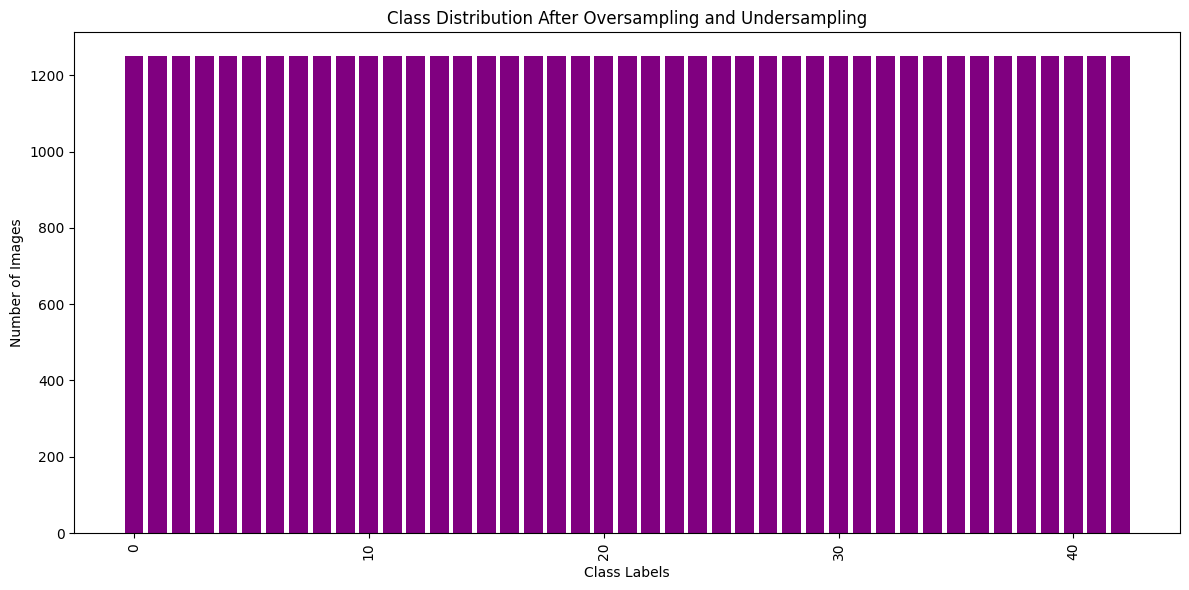

In [8]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Define target count for balancing
target_count = 1250

# Separate classes into oversample and undersample categories
oversample_classes = [label for label, count in label_counts.items() if count < target_count]
undersample_classes = [label for label, count in label_counts.items() if count > target_count]

# Define sampling strategies for over- and undersampling
oversample_strategy = {label: target_count for label in oversample_classes}
undersample_strategy = {label: target_count for label in undersample_classes}

# Create a combined pipeline for over- and undersampling
sampling_pipeline = Pipeline([
    ("oversample", RandomOverSampler(sampling_strategy=oversample_strategy)),
    ("undersample", RandomUnderSampler(sampling_strategy=undersample_strategy))
])

# Flatten the images for resampling
X_flat = X.reshape(len(X), -1)

# Apply the pipeline
X_resampled, y_resampled = sampling_pipeline.fit_resample(X_flat, y)

# Reshape the images back to their original dimensions
X_resampled = X_resampled.reshape(-1, *X.shape[1:])

# Display the new class distribution
new_label_counts = Counter(y_resampled)
print("Resampled dataset shape:", new_label_counts)

# Visualize the new class distribution
plt.figure(figsize=(12, 6))
plt.bar(new_label_counts.keys(), new_label_counts.values(), color='purple')
plt.xlabel("Class Labels")
plt.ylabel("Number of Images")
plt.title("Class Distribution After Oversampling and Undersampling")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

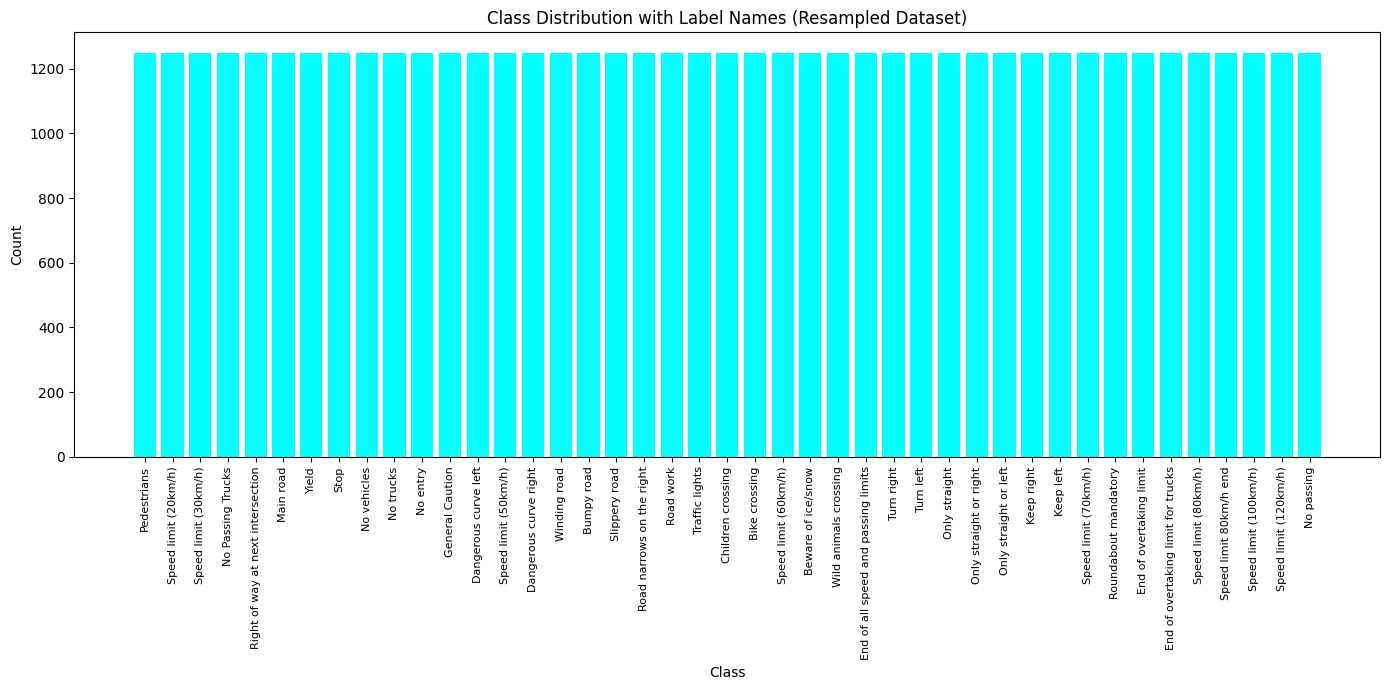

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

# Define the label mapping (names of the 43 classes)
label_mapping = {
    0: "Pedestrians",
    1: "Speed limit (20km/h)",
    2: "Speed limit (30km/h)",
    3: "No Passing Trucks",
    4: "Right of way at next intersection",
    5: "Main road",
    6: "Yield",
    7: "Stop",
    8: "No vehicles",
    9: "No trucks",
    10: "No entry",
    11: "General Caution",
    12: "Dangerous curve left",
    13: "Speed limit (50km/h)",
    14: "Dangerous curve right",
    15: "Winding road",
    16: "Bumpy road",
    17: "Slippery road",
    18: "Road narrows on the right",
    19: "Road work",
    20: "Traffic lights",
    21: "Children crossing",
    22: "Bike crossing",
    23: "Speed limit (60km/h)",
    24: "Beware of ice/snow",
    25: "Wild animals crossing",
    26: "End of all speed and passing limits",
    27: "Turn right",
    28: "Turn left",
    29: "Only straight",
    30: "Only straight or right",
    31: "Only straight or left",
    32: "Keep right",
    33: "Keep left",
    34: "Speed limit (70km/h)",
    35: "Roundabout mandatory",
    36: "End of overtaking limit",
    37: "End of overtaking limit for trucks",
    38: "Speed limit (80km/h)",
    39: "Speed limit 80km/h end",
    40: "Speed limit (100km/h)",
    41: "Speed limit (120km/h)",
    42: "No passing"
}

# Retrieve label counts from the resampled dataset
label_counts = Counter(y_resampled)

# Convert label indices to their names
label_names = {idx: label_mapping[idx] for idx in label_counts.keys()}
label_counts_named = {label_names[idx]: count for idx, count in label_counts.items()}

# Plot the class distribution with label names
plt.figure(figsize=(14, 7))
plt.bar(label_counts_named.keys(), label_counts_named.values(), color='cyan')
plt.xticks(rotation=90, fontsize=8)  # Rotate and adjust label size
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution with Label Names (Resampled Dataset)")
plt.tight_layout()
plt.show()

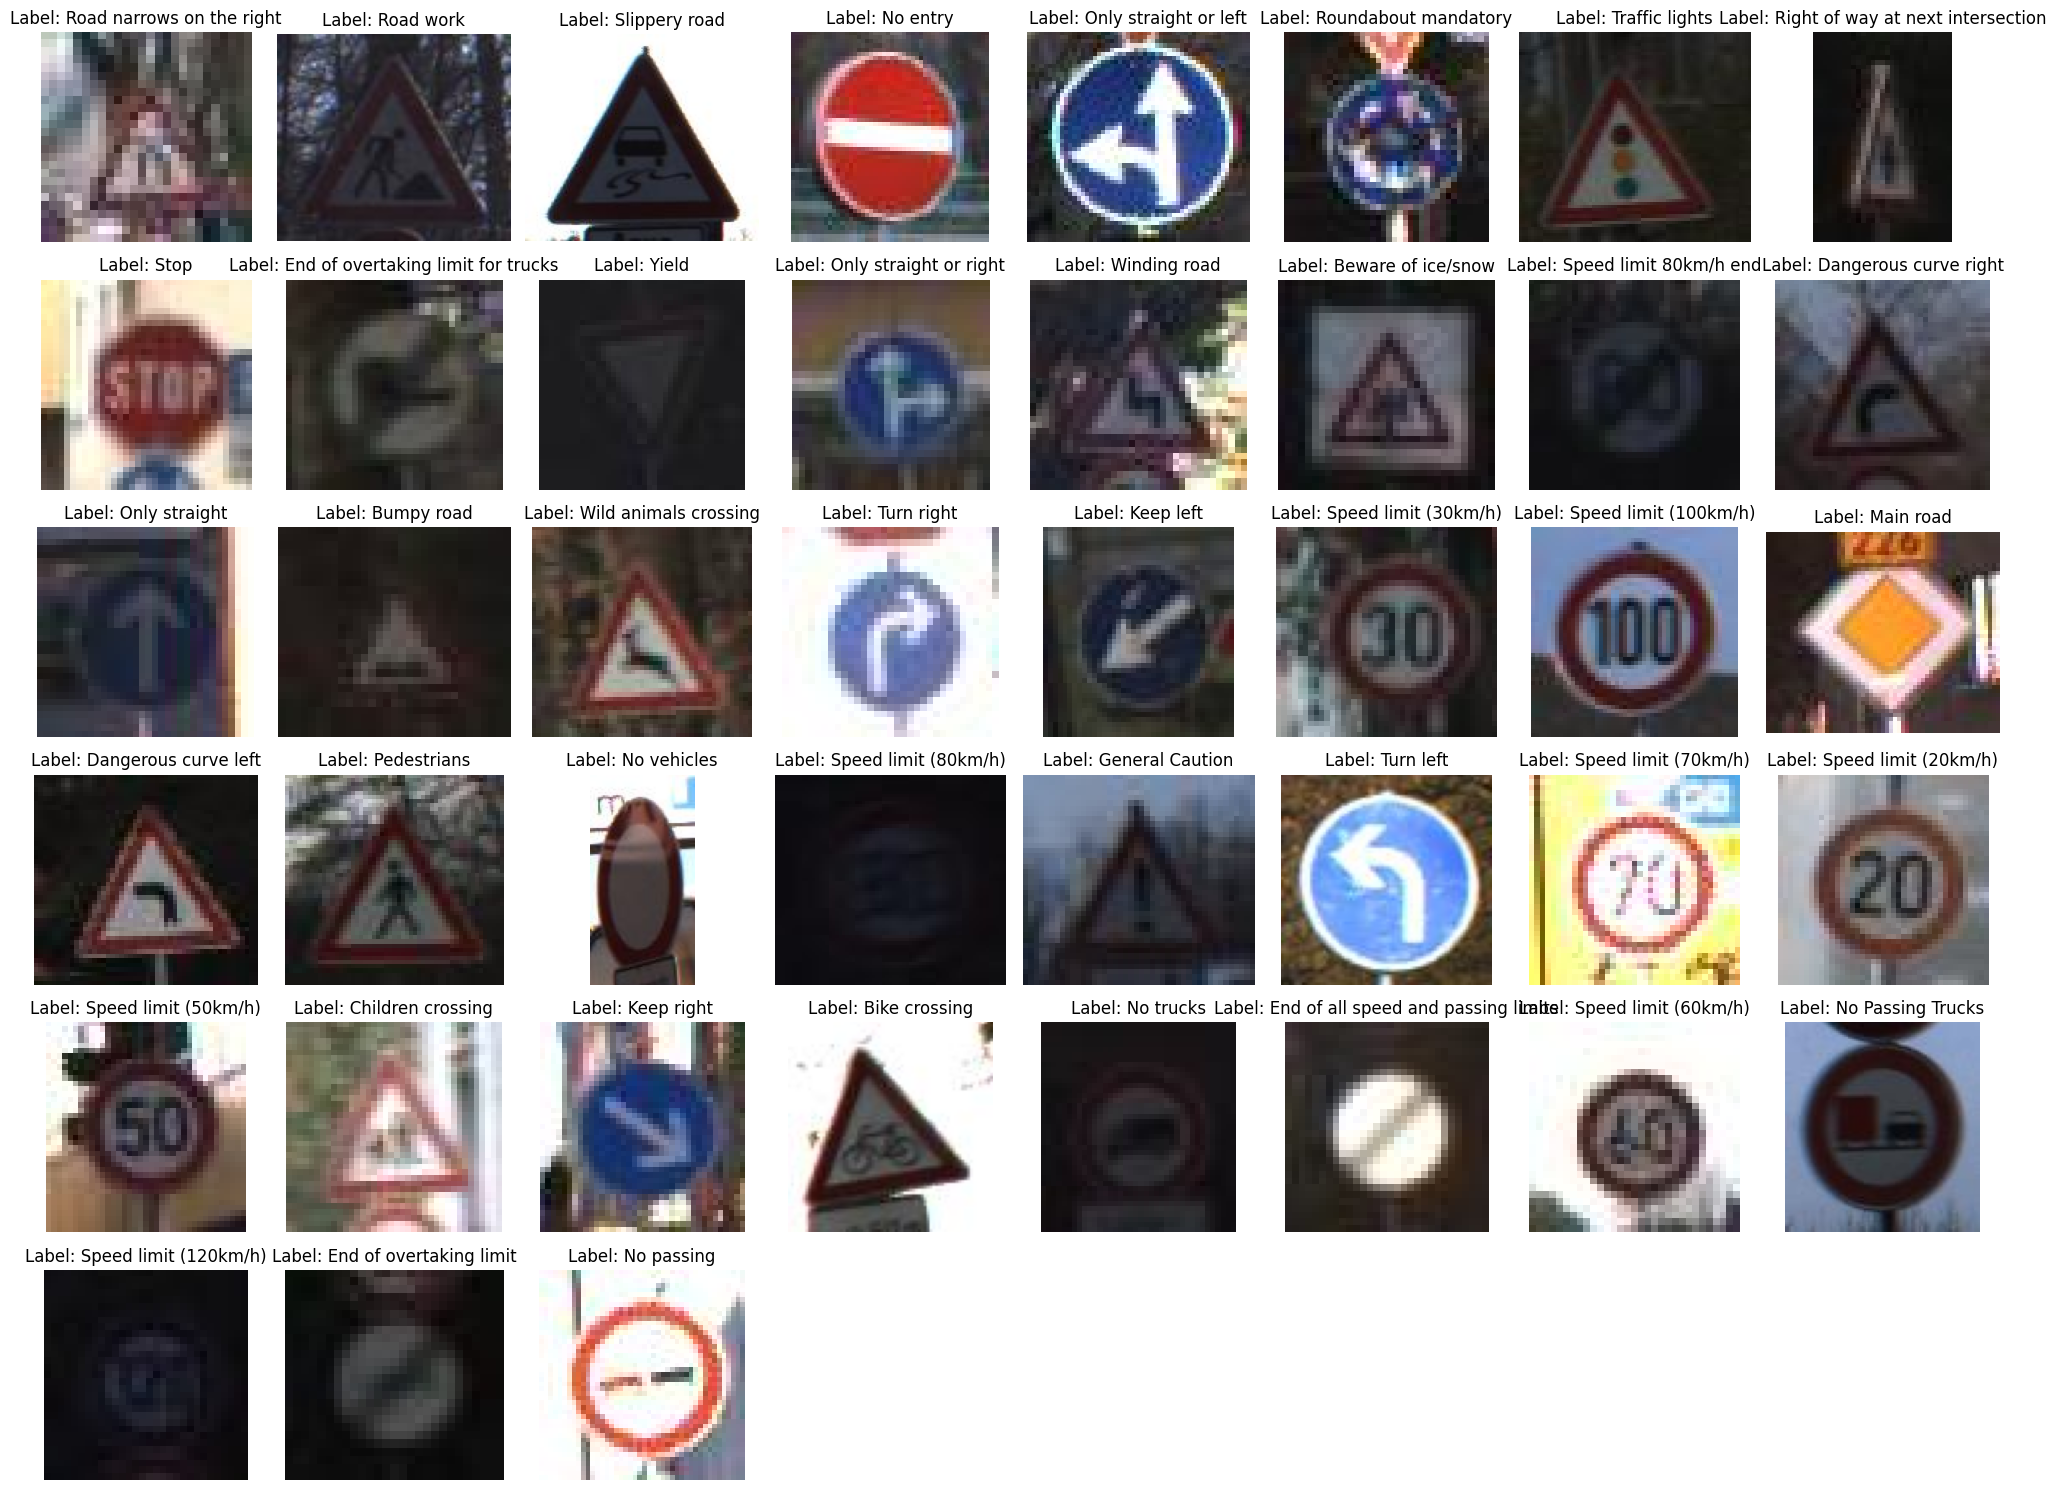

In [10]:
import matplotlib.pyplot as plt

# Dictionary to store one example image per category
category_images = {}

# Loop through the dataset to find one image for each category
for sample in train_ds:
    label = sample['labels'].numpy().item()
    if label not in category_images:  # Add only one image per category
        category_images[label] = sample['images'].numpy()
    if len(category_images) == len(label_mapping):  # Stop if all categories are covered
        break

# Visualize one image from each category
fig, axes = plt.subplots(6, 8, figsize=(20, 15))  # Adjust grid size for 43 categories
axes = axes.flat

for ax, (label, image) in zip(axes, category_images.items()):
    label_name = label_mapping[label]
    ax.imshow(image)
    ax.set_title(f"Label: {label_name}")
    ax.axis('off')

# Hide any remaining unused subplots
for ax in axes[len(category_images):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


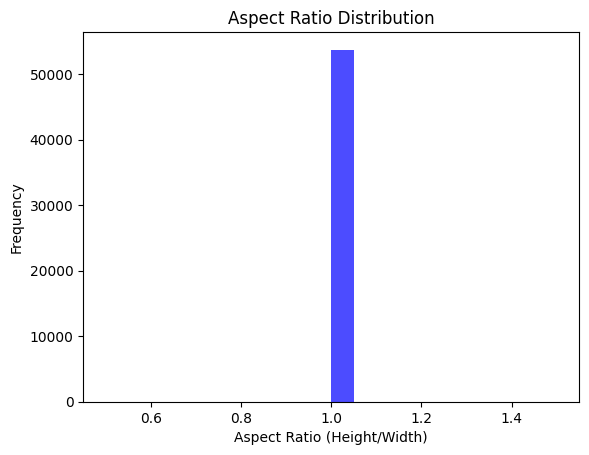

In [11]:
import numpy as np

# Analyze image dimensions
image_shapes = [X_resampled[i].shape[:2] for i in range(len(X_resampled))]
unique_shapes = set(image_shapes)

# Calculate aspect ratios
aspect_ratios = [h / w for h, w in image_shapes]

# Plot aspect ratio distribution
plt.hist(aspect_ratios, bins=20, color='blue', alpha=0.7)
plt.title("Aspect Ratio Distribution")
plt.xlabel("Aspect Ratio (Height/Width)")
plt.ylabel("Frequency")
plt.show()


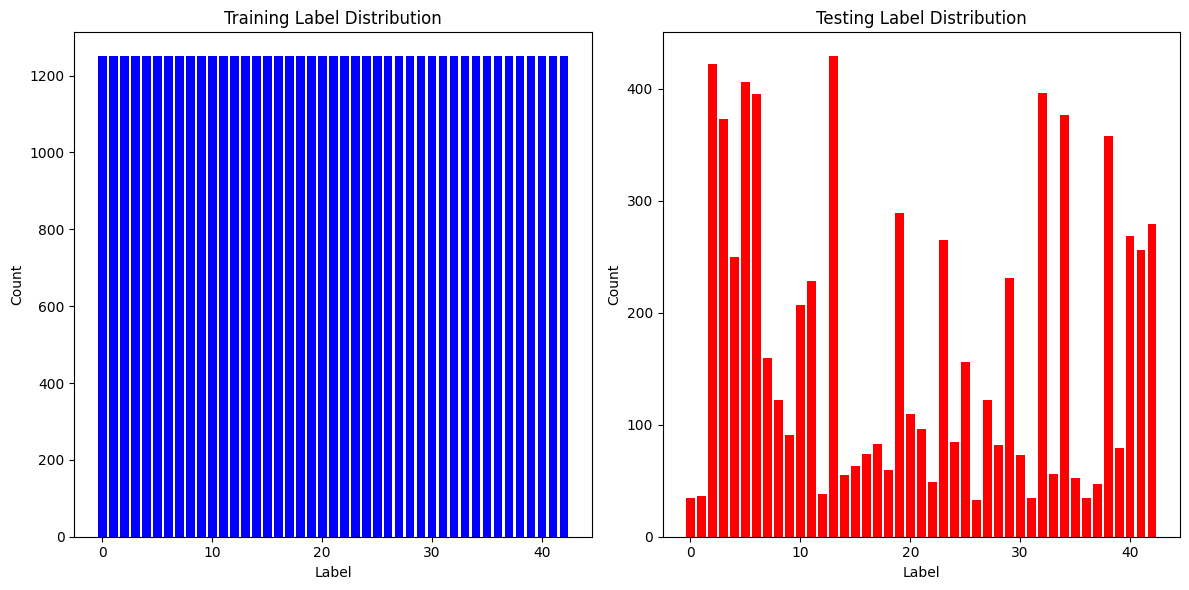

In [12]:
# Compare train and test label distributions
test_labels = [sample['labels'].numpy().item() for sample in test_ds]
test_label_counts = Counter(test_labels)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Train distribution
axes[0].bar(label_counts.keys(), label_counts.values(), color='blue')
axes[0].set_title("Training Label Distribution")
axes[0].set_xlabel("Label")
axes[0].set_ylabel("Count")

# Test distribution
axes[1].bar(test_label_counts.keys(), test_label_counts.values(), color='red')
axes[1].set_title("Testing Label Distribution")
axes[1].set_xlabel("Label")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

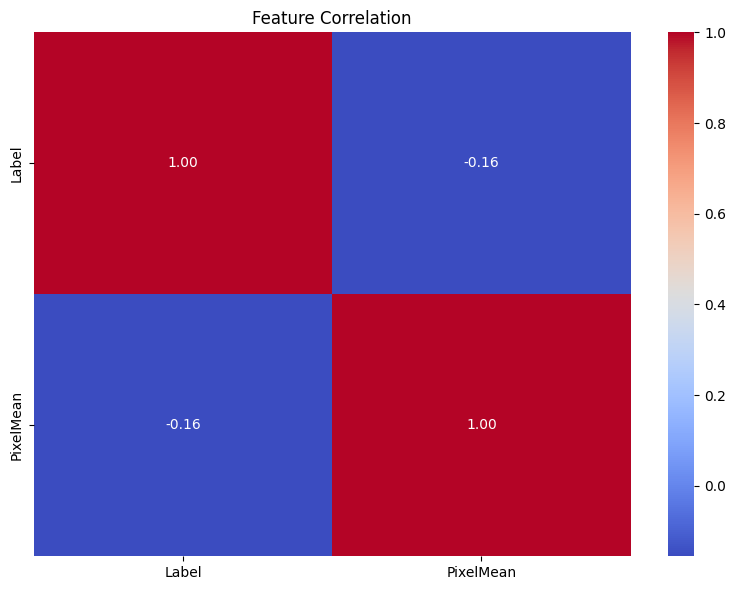

In [13]:
import pandas as pd
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt

# Create a dataframe with additional features
df = pd.DataFrame({
    'Label': y_resampled,  # Use labels from y_resampled
    'PixelMean': [X_resampled[i].mean() for i in range(len(X_resampled))]  # Mean pixel value
})

# Compute correlation
correlation_matrix = df.corr()

# Visualize correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation")
plt.tight_layout()
plt.show()


In [14]:
import numpy as np
from PIL import Image

# Resize function
def resize_image(image, size=(32, 32)):
    img = Image.fromarray(image)
    img = img.resize(size)
    return np.array(img)

# Convert training data to NumPy arrays
x_train = np.array([resize_image(image) for image in X_resampled])
y_train = np.array(y_resampled)

# Convert testing data to NumPy arrays
x_test = np.array([resize_image(image.numpy()) for image in test_ds['images']])
y_test = np.array([label.numpy() for label in test_ds['labels']])

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train shape: (53750, 32, 32, 3), y_train shape: (53750,)
x_test shape: (7357, 32, 32, 3), y_test shape: (7357, 1)


In [15]:
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (53750, 32, 32, 3)
Testing data shape: (7357, 32, 32, 3)


In [16]:
print("Number of classes:", len(set(y_train.flatten())))

Number of classes: 43


In [17]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)

(53750, 32, 32, 3)
(53750,)
(7357, 32, 32, 3)
(7357, 1)


In [18]:
# Define image dimensions
img_rows, img_cols = 32, 32

# Reshape training and testing data to ensure compatibility with CNNs
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)

# Define input shape for the CNN
input_shape = (img_rows, img_cols, 3)

# Verify the shapes
print("Training data shape after reshaping:", x_train.shape)
print("Testing data shape after reshaping:", x_test.shape)
print("Input shape for CNN:", input_shape)

Training data shape after reshaping: (53750, 32, 32, 3)
Testing data shape after reshaping: (7357, 32, 32, 3)
Input shape for CNN: (32, 32, 3)


In [19]:
from tensorflow.keras.utils import to_categorical

# The total number of classes is 43 for GTSRB
num_classes = 43

# Ensure the data type is float value and not an integer
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize the pixel values to the range [0, 1]
x_train /= 255
x_test /= 255

# Print dataset details
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# One-hot encode the labels for GTSRB
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (53750, 32, 32, 3)
53750 train samples
7357 test samples


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.4,  # Randomly zoom image
    width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    brightness_range=[0.7, 1.3],
    shear_range=0.3
)
datagen.fit(x_train)

In [21]:
# Additional Data Augmentation: Convert images to grayscale (black and white)
def convert_to_grayscale(images):
    return np.expand_dims(np.mean(images, axis=-1), axis=-1)  # Convert to grayscale

grayscale_datagen = ImageDataGenerator(
    samplewise_center=True,  # set each sample mean to 0
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.4,  # Randomly zoom image
    width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.3,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,
    brightness_range=[0.7, 1.3],
    shear_range=0.3,
    preprocessing_function=convert_to_grayscale  # Convert to black and white
)

grayscale_datagen.fit(x_train)

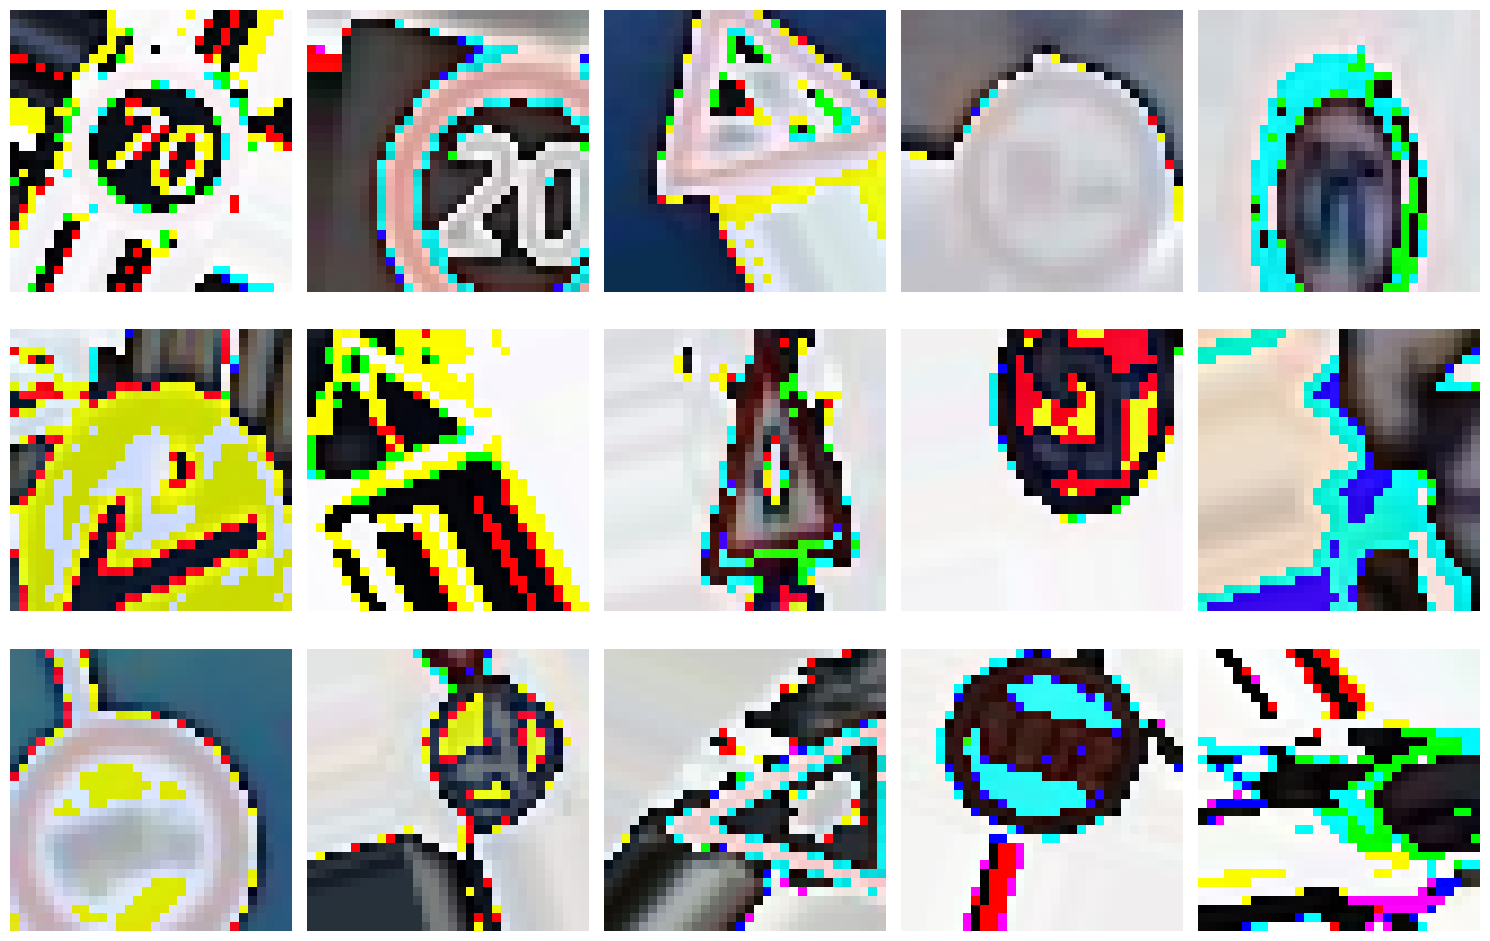

In [22]:
import random  # Import the random module

# Visualize augmented images from random samples
fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # 3 rows, 5 columns
for ax in axes.flat:
    idx = random.randint(0, len(X_resampled) - 1)  # Pick a random image
    sample_image = X_resampled[idx]  # Get the image from X_resampled
    sample_image = np.expand_dims(sample_image, axis=0)  # Expand dimensions for datagen

    # Generate an augmented image
    augmented_image = next(datagen.flow(sample_image, batch_size=1))[0].astype('uint8')
    ax.imshow(augmented_image)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [23]:
# Required imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

#Building the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(43))
model.add(Activation('softmax'))

/home/moanish/.conda/envs/TensorFlow-GPU/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1738235116.748189  564038 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30160 MB memory:  -> device: 0, name: Tesla V100-DGXS-32GB, pci bus id: 0000:07:00.0, compute capability: 7.0
I0000 00:00:1738235116.748752  564038 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 6307 MB memory:  -> device: 1, name: Tesla V100-DGXS-32GB, pci bus id: 0000:08:00.0, compute capability: 7.0
I0000 00:00:1738235116.749206  564038 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 938 MB memory:  -> device: 2, name: Te

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 43)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,067 (1.38 MB)

 Trainable params: 361,067 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.optimizers import Adam

# optimizer = Adam(learning_rate=0.0001)

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
batch_size = 64
num_classes = 43
epochs = 5

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

model_log = model.fit(x_train, y_train,
                      batch_size=batch_size, # number of samples to be used for each gradient update
                      epochs=epochs, # number of iterations over the entire x_train data
                      validation_data=(x_test, y_test),
                      callbacks=[early_stopping]
                     )

Epoch 1/5


I0000 00:00:1738235138.365764  659558 service.cc:148] XLA service 0x7fbcd8004cf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738235138.365787  659558 service.cc:156]   StreamExecutor device (0): Tesla V100-DGXS-32GB, Compute Capability 7.0
I0000 00:00:1738235138.365790  659558 service.cc:156]   StreamExecutor device (1): Tesla V100-DGXS-32GB, Compute Capability 7.0
I0000 00:00:1738235138.365795  659558 service.cc:156]   StreamExecutor device (2): Tesla V100-DGXS-32GB, Compute Capability 7.0
I0000 00:00:1738235138.365797  659558 service.cc:156]   StreamExecutor device (3): Tesla V100-DGXS-32GB, Compute Capability 7.0
2025-01-30 19:05:38.445169: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738235138.898433  659558 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-30 19:05:39.495813: I external/local_xla/xla

 27/840 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0238 - loss: 3.7658

I0000 00:00:1738235142.001413  659558 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


837/840 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2690 - loss: 2.6644

2025-01-30 19:05:47.482610: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[54,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[54,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-30 19:05:47.493826: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[54,64,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[54,32,16,16]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationF

840/840 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2699 - loss: 2.6609

2025-01-30 19:05:50.630953: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[64,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-30 19:05:50.651414: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[64,64,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,32,16,16]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationF

840/840 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.2701 - loss: 2.6597 - val_accuracy: 0.8289 - val_loss: 0.5669
Epoch 2/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8663 - loss: 0.4072 - val_accuracy: 0.9010 - val_loss: 0.3492
Epoch 3/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9345 - loss: 0.1972 - val_accuracy: 0.9266 - val_loss: 0.2791
Epoch 4/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9567 - loss: 0.1301 - val_accuracy: 0.9430 - val_loss: 0.2364
Epoch 5/5
840/840 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9704 - loss: 0.0925 - val_accuracy: 0.9411 - val_loss: 0.2355


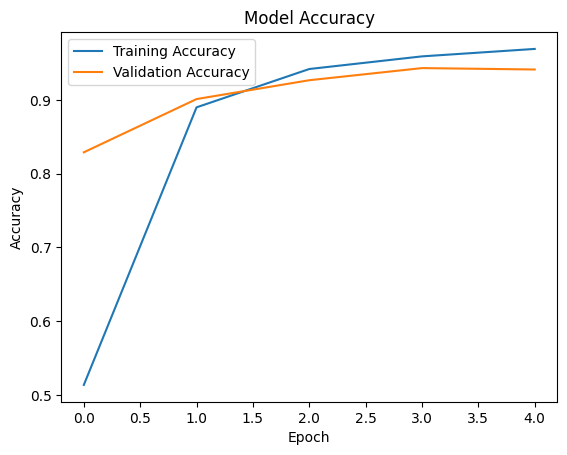

In [28]:
# Plot training history
import matplotlib.pyplot as plt

plt.plot(model_log.history['accuracy'], label='Training Accuracy')
plt.plot(model_log.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

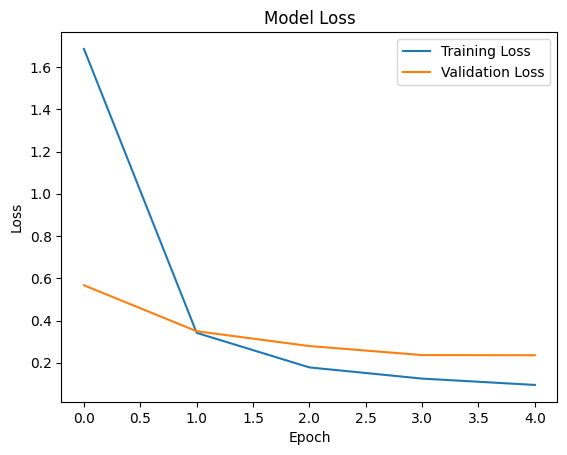

In [29]:
plt.plot(model_log.history['loss'], label='Training Loss')
plt.plot(model_log.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2025-01-30 19:06:36.682274: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-30 19:06:36.700455: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,64,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,16,16]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationF

220/230 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

2025-01-30 19:06:38.072408: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[29,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[29,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-30 19:06:38.090750: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[29,64,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[29,32,16,16]{3,2,1,0}, f32[64,32,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationF

230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


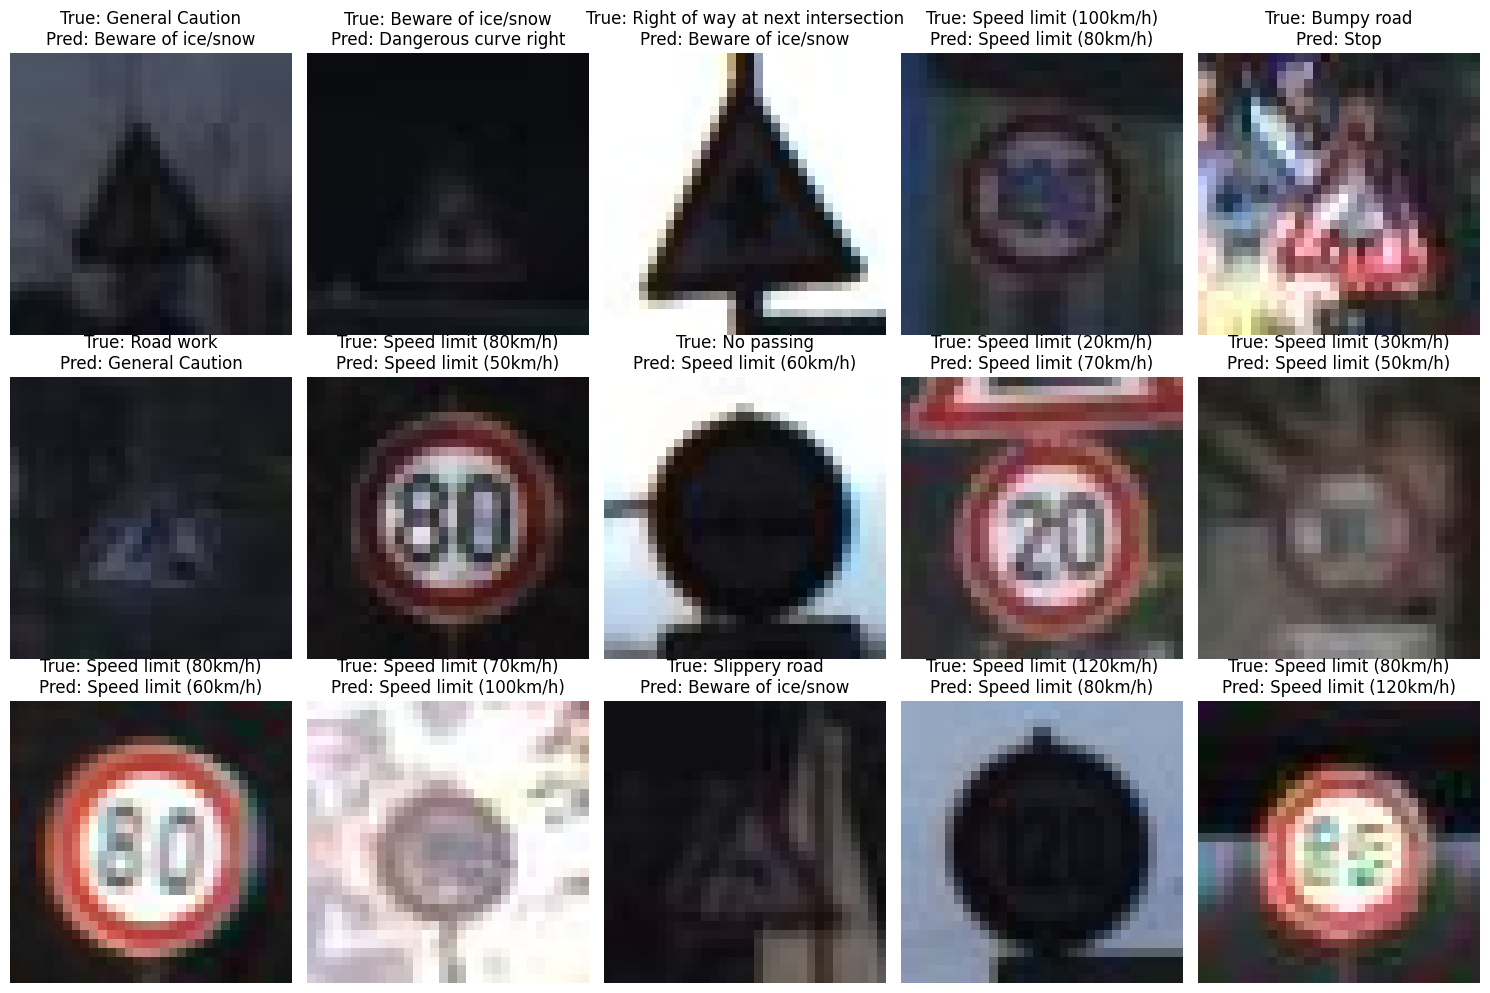

In [30]:
# Assuming `model`, `x_test`, `y_test`, and `label_mapping` are defined
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Identify misclassified indices
misclassified_indices = [i for i in range(len(y_test)) if y_pred[i] != y_true[i]]

# Plot the misclassified images
fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # Adjust rows and columns as needed
for i, ax in enumerate(axes.flat):
    if i < len(misclassified_indices):
        idx = misclassified_indices[i]
        ax.imshow(x_test[idx])
        true_label_name = label_mapping[y_true[idx]]  # Map true index to class name
        pred_label_name = label_mapping[y_pred[idx]]  # Map predicted index to class name
        ax.set_title(f"True: {true_label_name}\nPred: {pred_label_name}")
        ax.axis('off')
    else:
        ax.axis('off')  # Hide unused subplots
plt.tight_layout()
plt.show()

230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


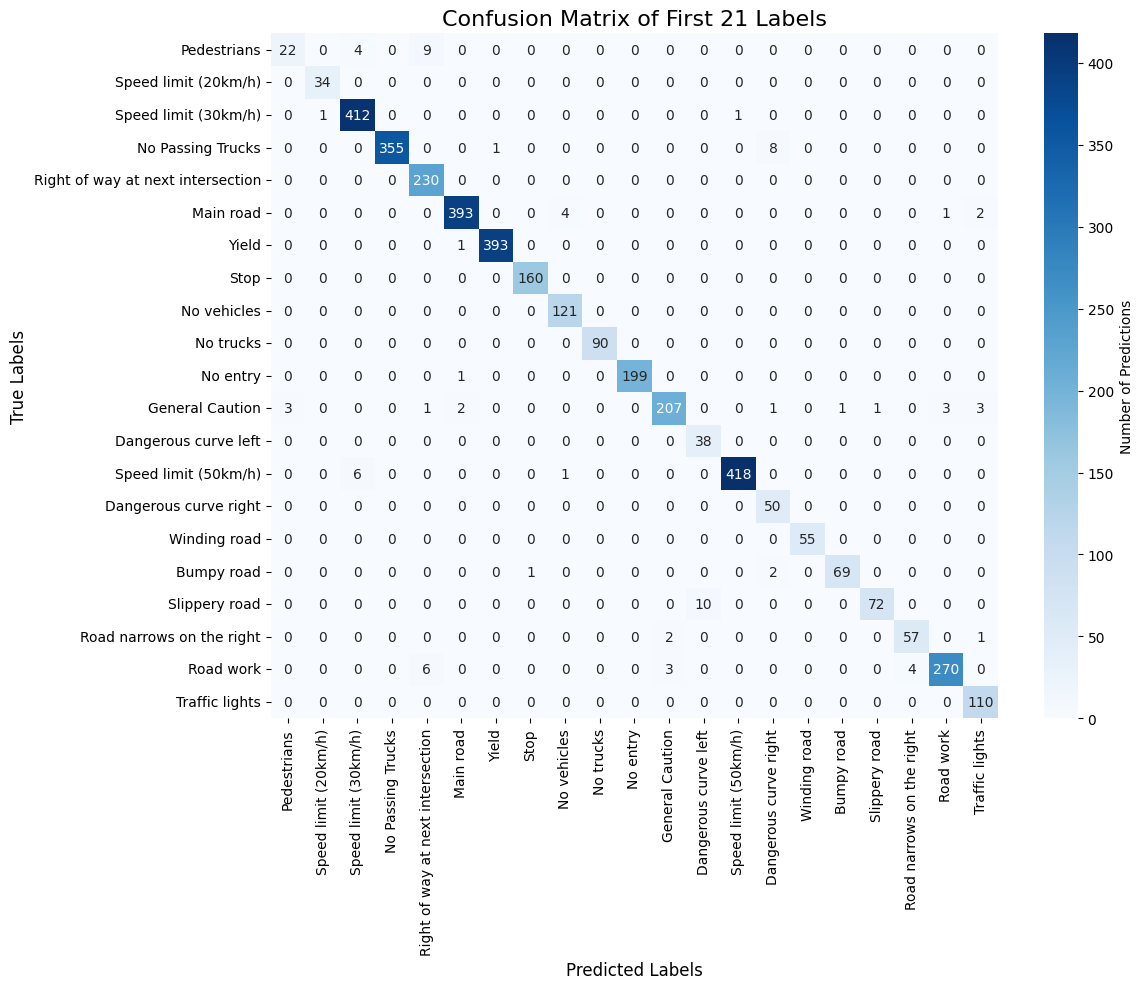

In [31]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(model.predict(x_test), axis=1)  # Model predictions
y_true = np.argmax(y_test, axis=1)  # True labels (one-hot encoded)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Split confusion matrix into two parts for better readability
# First part: Labels 0-20
cm_part1 = cm[:21, :21]
# Second part: Labels 21-42
cm_part2 = cm[21:, 21:]

# Plot the first part (labels 0-20)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_part1, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(label_mapping.values())[:21],
            yticklabels=list(label_mapping.values())[:21],
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Confusion Matrix of First 21 Labels', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


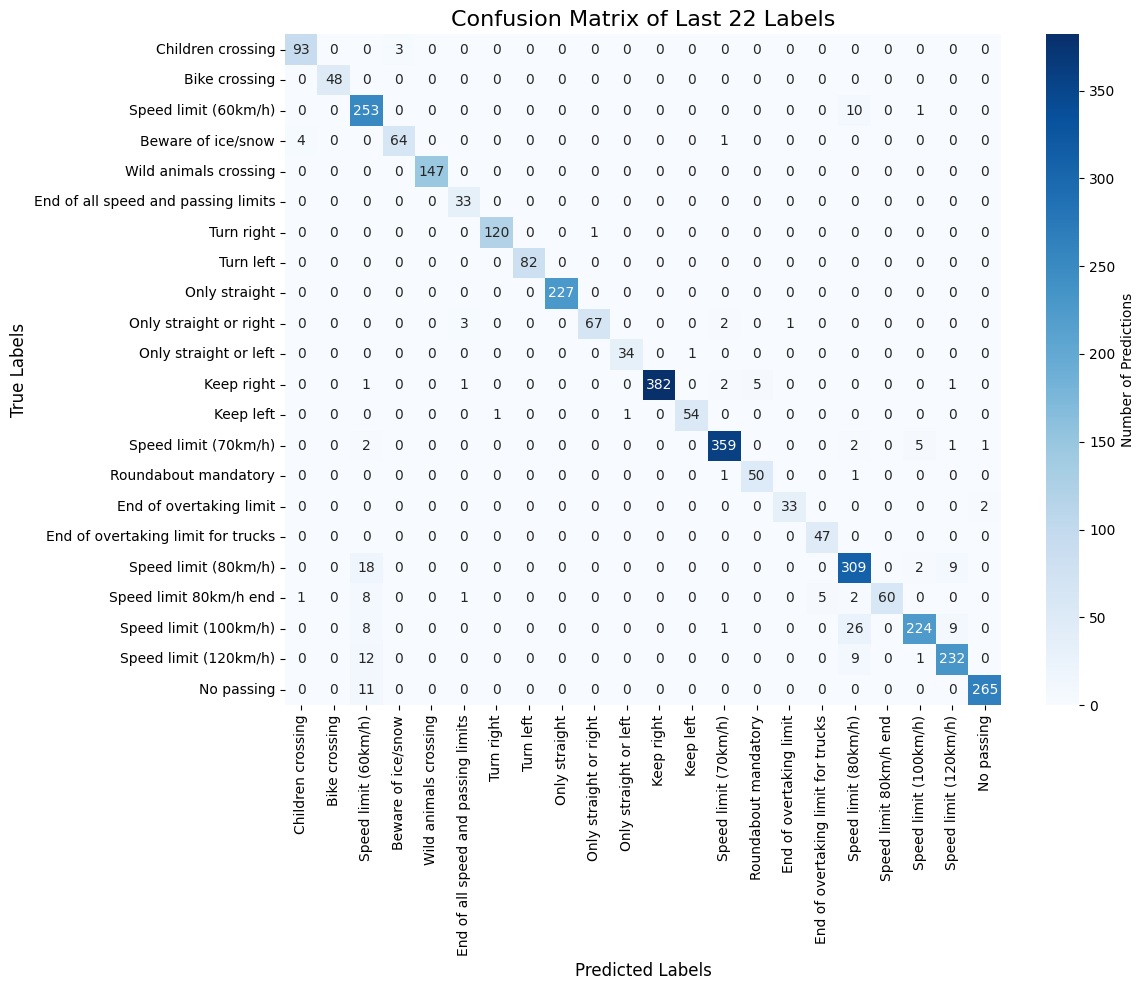

In [32]:
# Second part: Labels 21-42
cm_part2 = cm[21:, 21:]

# Plot the second part (labels 21-42)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_part2, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(label_mapping.values())[21:],
            yticklabels=list(label_mapping.values())[21:],
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Confusion Matrix of Last 22 Labels', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization, DepthwiseConv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from time import time

# Parameters
num_classes = 43
batch_size = 128
epochs = 20
learning_rate = 0.0001

# Early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Function to train and visualize results
def train_and_visualize(model, x_train, y_train, x_test, y_test):
    adam = Adam(learning_rate=learning_rate)

    model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

    start = time()
    model_log = model.fit(
        x_train, y_train,
        batch_size=batch_size,  
        epochs=epochs,  
        validation_data=(x_test, y_test),
        callbacks=[early_stopping],
        verbose=1
    )
    train_time = time() - start

    print(f"Training Time: {train_time:.2f} seconds")
    model.summary()

    # Plot accuracy and loss with larger figure size
    plt.figure(figsize=(16, 8))  # Increased figure size for better visibility
    plt.subplot(1, 2, 1)
    plt.plot(model_log.history['accuracy'], marker='o', linestyle='-', label='Train Accuracy')
    plt.plot(model_log.history['val_accuracy'], marker='s', linestyle='-', label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.xticks(range(epochs))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.title("Model Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(model_log.history['loss'], marker='o', linestyle='-', label='Train Loss')
    plt.plot(model_log.history['val_loss'], marker='s', linestyle='-', label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.xticks(range(epochs))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    plt.title("Model Loss")

    plt.suptitle("Training Performance Over 20 Epochs", fontsize=14)
    plt.show()


In [34]:
from tensorflow.keras.applications import MobileNet

def mobilenet_model(input_shape, num_classes):
    base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax'),
    ])
    return model


/tmp/ipykernel_564038/2682103989.py:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=input_shape)



Training model: MobileNet
Epoch 1/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 71s 74ms/step - accuracy: 0.1166 - loss: 4.0951 - val_accuracy: 0.3064 - val_loss: 2.5061
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.5020 - loss: 1.8381 - val_accuracy: 0.4957 - val_loss: 1.7402
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7147 - loss: 0.9825 - val_accuracy: 0.5947 - val_loss: 1.4459
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8373 - loss: 0.5525 - val_accuracy: 0.6610 - val_loss: 1.2205
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8980 - loss: 0.3376 - val_accuracy: 0.6904 - val_loss: 1.1823
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9308 - loss: 0.2275 - val_accuracy: 0.7343 - val_loss: 1.0930
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9548 - loss: 0.1548 - val_accuracy: 0.7517 - val_loss: 1.0419
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 1, 1, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,053,059 (38.35 MB)

 Trainable params: 3,343,723 (12.76 MB)

 Non-trainable params: 21,888 (85.50 KB)

 Optimizer params: 6,687,448 (25.51 MB)

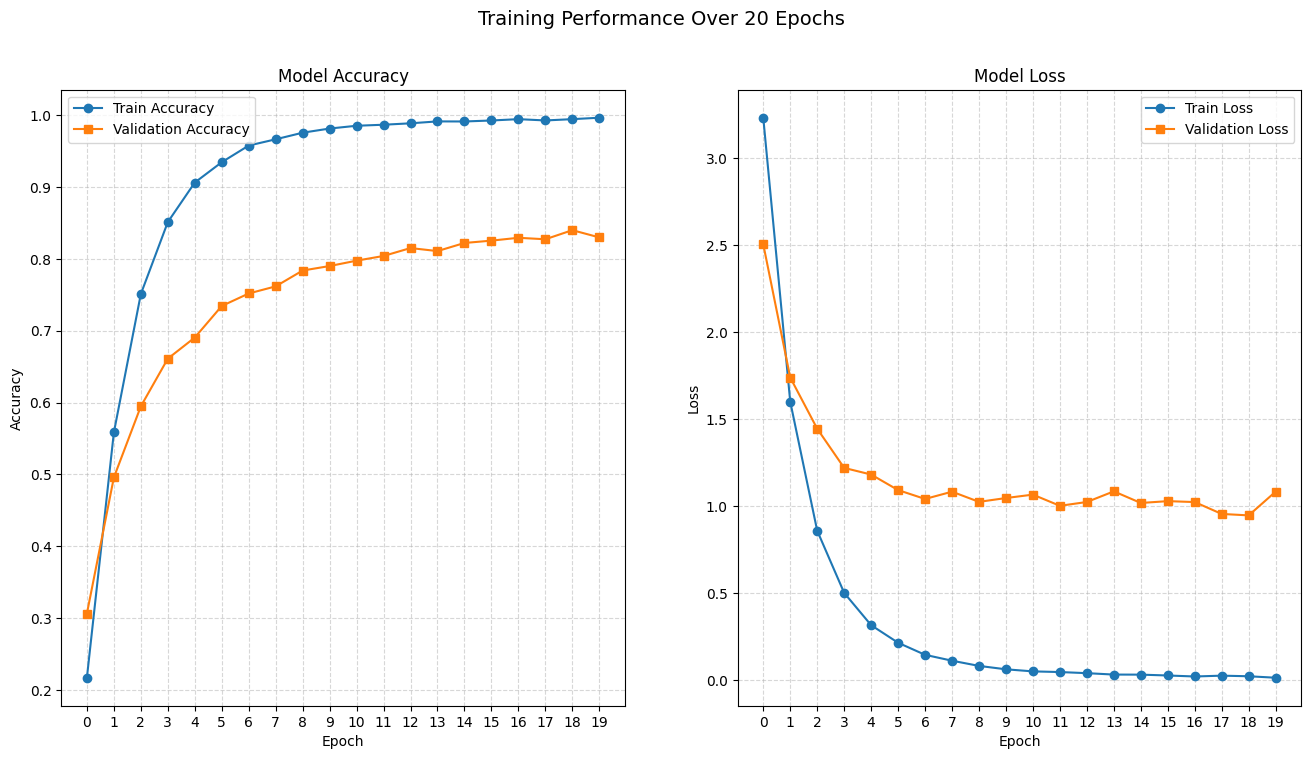

In [35]:
# Define models
models = {
    'MobileNet': mobilenet_model(input_shape, num_classes),
}

# Train each model
for model_name, model in models.items():
    print(f"\nTraining model: {model_name}")

    # Train and visualize results
    train_and_visualize(model, x_train, y_train, x_test, y_test)

In [36]:
from tensorflow.keras.applications import DenseNet121

def densenet_model(input_shape, num_classes):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        base_model,
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax'),
    ])
    return model



Training model: DenseNet
Epoch 1/20


2025-01-30 19:15:33.117835: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'loop_multiply_fusion_51', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'loop_slice_fusion_30', 8 bytes spill stores, 8 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_18', 28 bytes spill stores, 16 bytes spill loads



419/420 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.3341 - loss: 2.7545

2025-01-30 19:18:21.371121: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'input_maximum_transpose_fusion_1', 4 bytes spill stores, 4 bytes spill loads



420/420 ━━━━━━━━━━━━━━━━━━━━ 456s 516ms/step - accuracy: 0.3353 - loss: 2.7491 - val_accuracy: 0.7669 - val_loss: 0.7670
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.9346 - loss: 0.2389 - val_accuracy: 0.8745 - val_loss: 0.4909
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 30s 71ms/step - accuracy: 0.9846 - loss: 0.0634 - val_accuracy: 0.8996 - val_loss: 0.4273
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9919 - loss: 0.0338 - val_accuracy: 0.9000 - val_loss: 0.4374
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9938 - loss: 0.0266 - val_accuracy: 0.9145 - val_loss: 0.3999
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 30s 70ms/step - accuracy: 0.9960 - loss: 0.0164 - val_accuracy: 0.9163 - val_loss: 0.4100
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.9962 - loss: 0.0154 - val_accuracy: 0.9184 - val_loss: 0.4165
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - accuracy: 0.9969 - loss: 0.0136 - val_accur

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ (None, 1, 1, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,355,459 (81.46 MB)

 Trainable params: 7,090,603 (27.05 MB)

 Non-trainable params: 83,648 (326.75 KB)

 Optimizer params: 14,181,208 (54.10 MB)

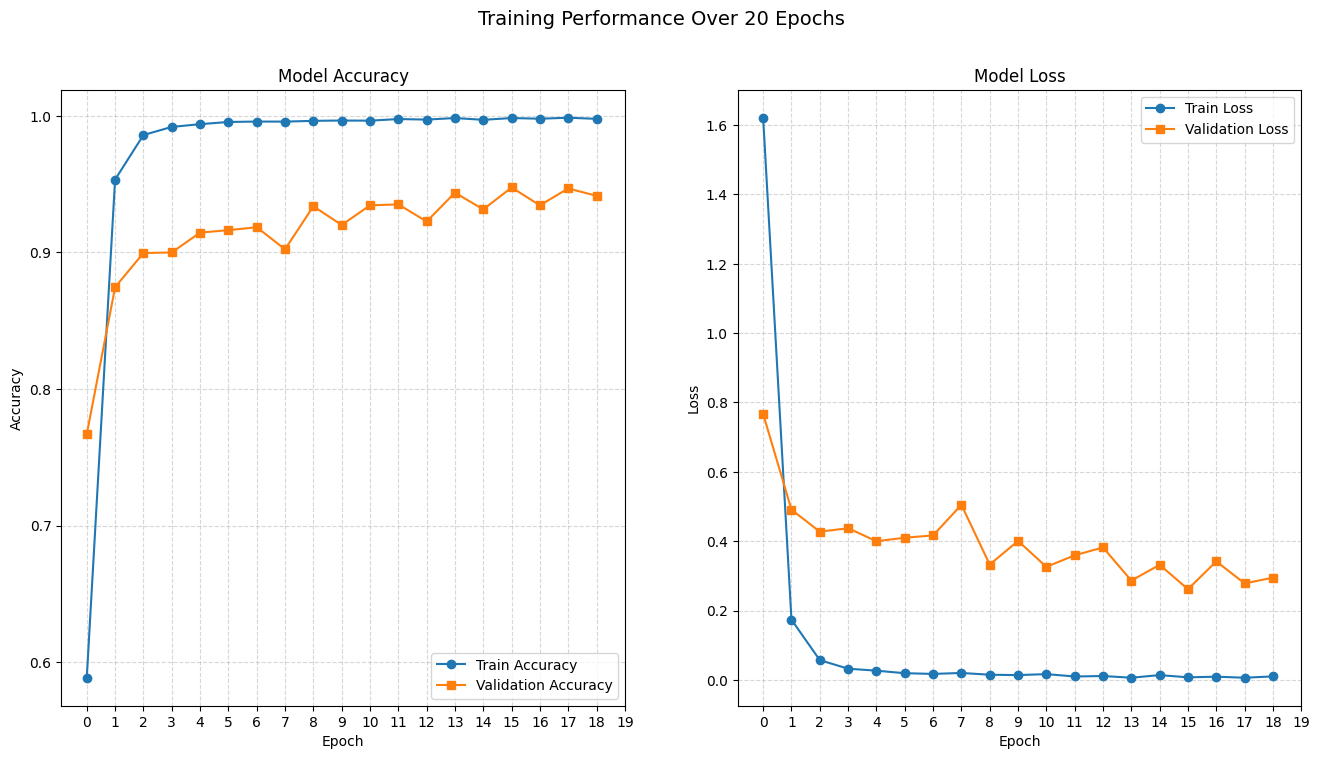

In [37]:
# Define models
models = {
    'DenseNet': densenet_model(input_shape, num_classes),
}

# Train each model
for model_name, model in models.items():
    print(f"\nTraining model: {model_name}")

    # Train and visualize results
    train_and_visualize(model, x_train, y_train, x_test, y_test)

In [38]:
from tensorflow.keras.applications import VGG16

def vgg16_model(input_shape, num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax'),
    ])
    return model



Training model: VGG16
Epoch 1/20


2025-01-30 19:29:35.094081: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[128,64,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,64,32,32]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-30 19:29:35.167817: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[128,128,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,64,16,16]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasAc

419/420 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5310 - loss: 1.6609

2025-01-30 19:29:55.410942: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[118,64,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[118,64,32,32]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-30 19:29:55.484227: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[118,128,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[118,64,16,16]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasAc

420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5316 - loss: 1.6587

2025-01-30 19:30:03.493302: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[128,64,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,64,32,32]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-30 19:30:03.577122: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[128,128,16,16]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,64,16,16]{3,2,1,0}, f32[128,64,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasAc

420/420 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.5321 - loss: 1.6566 - val_accuracy: 0.8755 - val_loss: 0.4169
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9750 - loss: 0.0888 - val_accuracy: 0.9126 - val_loss: 0.3139
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9865 - loss: 0.0447 - val_accuracy: 0.9213 - val_loss: 0.3295
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9918 - loss: 0.0282 - val_accuracy: 0.9354 - val_loss: 0.2631
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9938 - loss: 0.0201 - val_accuracy: 0.9350 - val_loss: 0.2702
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9951 - loss: 0.0181 - val_accuracy: 0.9464 - val_loss: 0.2350
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9936 - loss: 0.0245 - val_accuracy: 0.9214 - val_loss: 0.3740
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9955 - loss: 0.0171 - val_accurac

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,998,211 (171.65 MB)

 Trainable params: 14,999,403 (57.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,998,808 (114.44 MB)

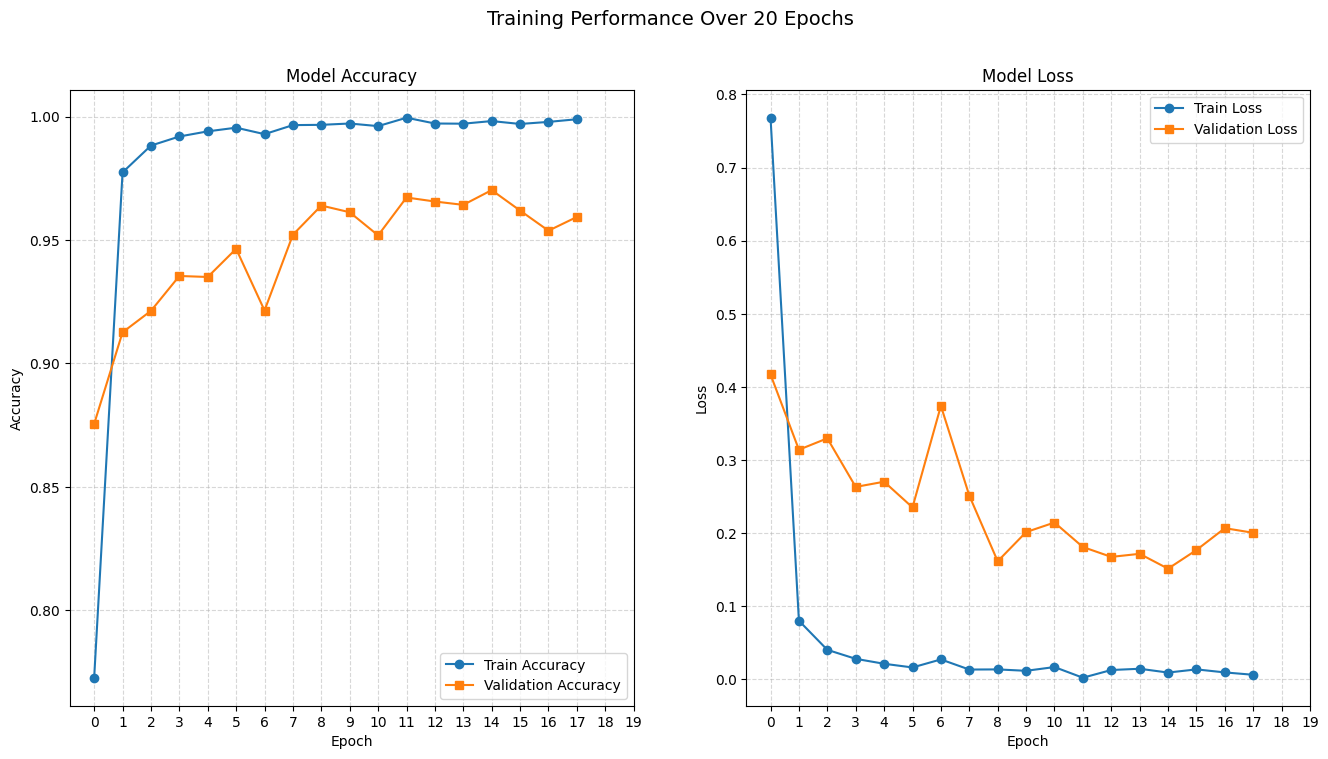

In [39]:
# Define models
models = {
    'VGG16': vgg16_model(input_shape, num_classes),
}

# Train each model
for model_name, model in models.items():
    print(f"\nTraining model: {model_name}")

    # Train and visualize results
    train_and_visualize(model, x_train, y_train, x_test, y_test)

In [40]:
from tensorflow.keras.applications import ResNet50

def resnet50_model(input_shape, num_classes):
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax'),
    ])
    return model



Training model: ResNet50
Epoch 1/20


2025-01-30 19:35:53.827239: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[128,64,8,8]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,64,8,8]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-30 19:35:53.952748: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[128,128,4,4]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,128,4,4]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivati

419/420 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.3383 - loss: 2.9105

2025-01-30 19:36:46.038158: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[118,64,8,8]{3,2,1,0}, u8[0]{0}) custom-call(f32[118,64,8,8]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-30 19:36:46.206892: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[118,128,4,4]{3,2,1,0}, u8[0]{0}) custom-call(f32[118,128,4,4]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivati

420/420 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.3389 - loss: 2.9075

2025-01-30 19:37:19.804377: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[61,64,8,8]{3,2,1,0}, u8[0]{0}) custom-call(f32[61,64,8,8]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-01-30 19:37:19.949570: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[61,128,4,4]{3,2,1,0}, u8[0]{0}) custom-call(f32[61,128,4,4]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}, f32[128]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationFo

420/420 ━━━━━━━━━━━━━━━━━━━━ 157s 157ms/step - accuracy: 0.3395 - loss: 2.9045 - val_accuracy: 0.0140 - val_loss: 10.0159
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9309 - loss: 0.2322 - val_accuracy: 0.5449 - val_loss: 2.0968
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9805 - loss: 0.0665 - val_accuracy: 0.8240 - val_loss: 0.8499
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step - accuracy: 0.9900 - loss: 0.0360 - val_accuracy: 0.8501 - val_loss: 0.7756
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9926 - loss: 0.0303 - val_accuracy: 0.8505 - val_loss: 0.7852
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9933 - loss: 0.0231 - val_accuracy: 0.8730 - val_loss: 0.7105
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9939 - loss: 0.0229 - val_accuracy: 0.8747 - val_loss: 0.6371
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.9956 - loss: 0.0169 - val_accu

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,263,683 (275.66 MB)

 Trainable params: 24,070,187 (91.82 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 48,140,376 (183.64 MB)

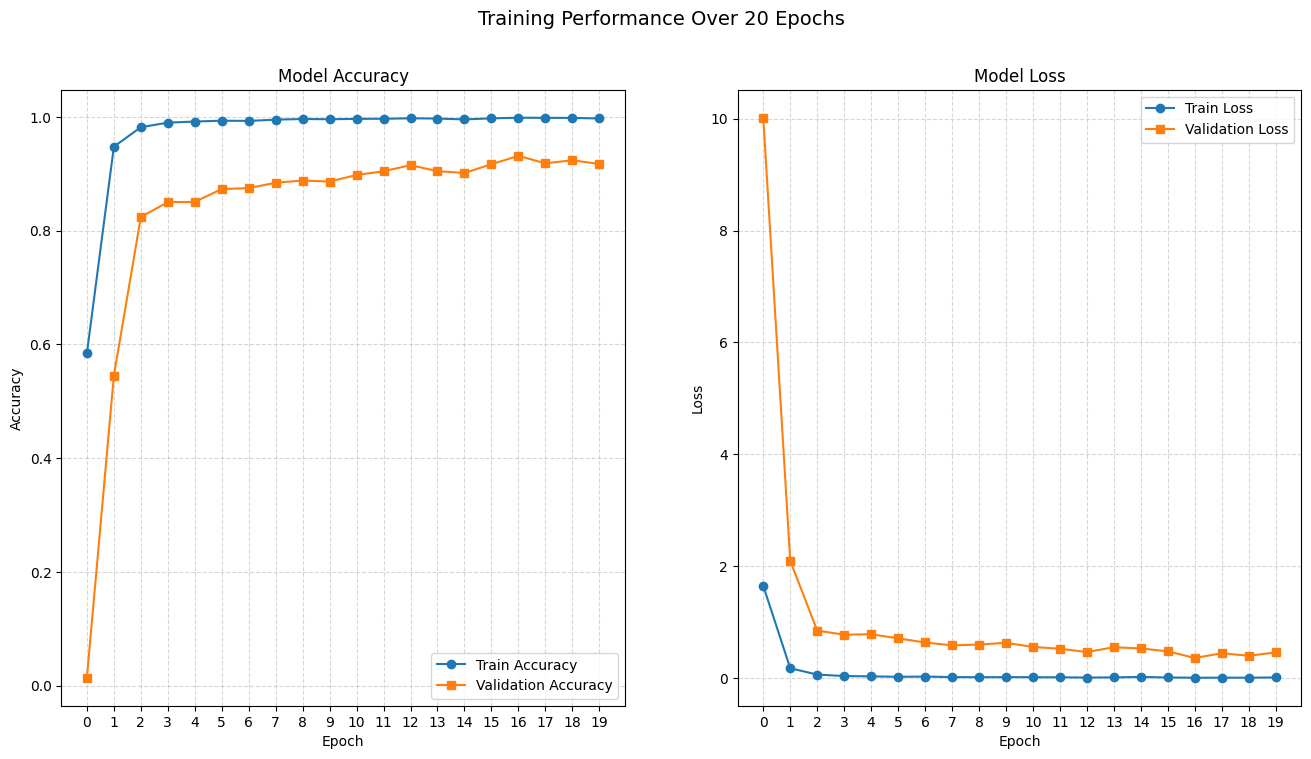

In [41]:
# Define models
models = {
    'ResNet50': resnet50_model(input_shape, num_classes),
}

# Train each model
for model_name, model in models.items():
    print(f"\nTraining model: {model_name}")

    # Train and visualize results
    train_and_visualize(model, x_train, y_train, x_test, y_test)

In [52]:
from tensorflow.keras.applications import VGG19

def vgg19_model(input_shape, num_classes):
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax'),
    ])
    return model



Training model: VGG19
Epoch 1/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 27s 47ms/step - accuracy: 0.4673 - loss: 1.9205 - val_accuracy: 0.8913 - val_loss: 0.4073
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9563 - loss: 0.1499 - val_accuracy: 0.9354 - val_loss: 0.2521
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9793 - loss: 0.0739 - val_accuracy: 0.9295 - val_loss: 0.2524
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9870 - loss: 0.0461 - val_accuracy: 0.9360 - val_loss: 0.2660
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9897 - loss: 0.0412 - val_accuracy: 0.9481 - val_loss: 0.2654
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9923 - loss: 0.0311 - val_accuracy: 0.9564 - val_loss: 0.2354
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9932 - loss: 0.0285 - val_accuracy: 0.9402 - val_loss: 0.2699
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,500,291 (230.79 MB)

 Trainable params: 20,166,763 (76.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,333,528 (153.86 MB)

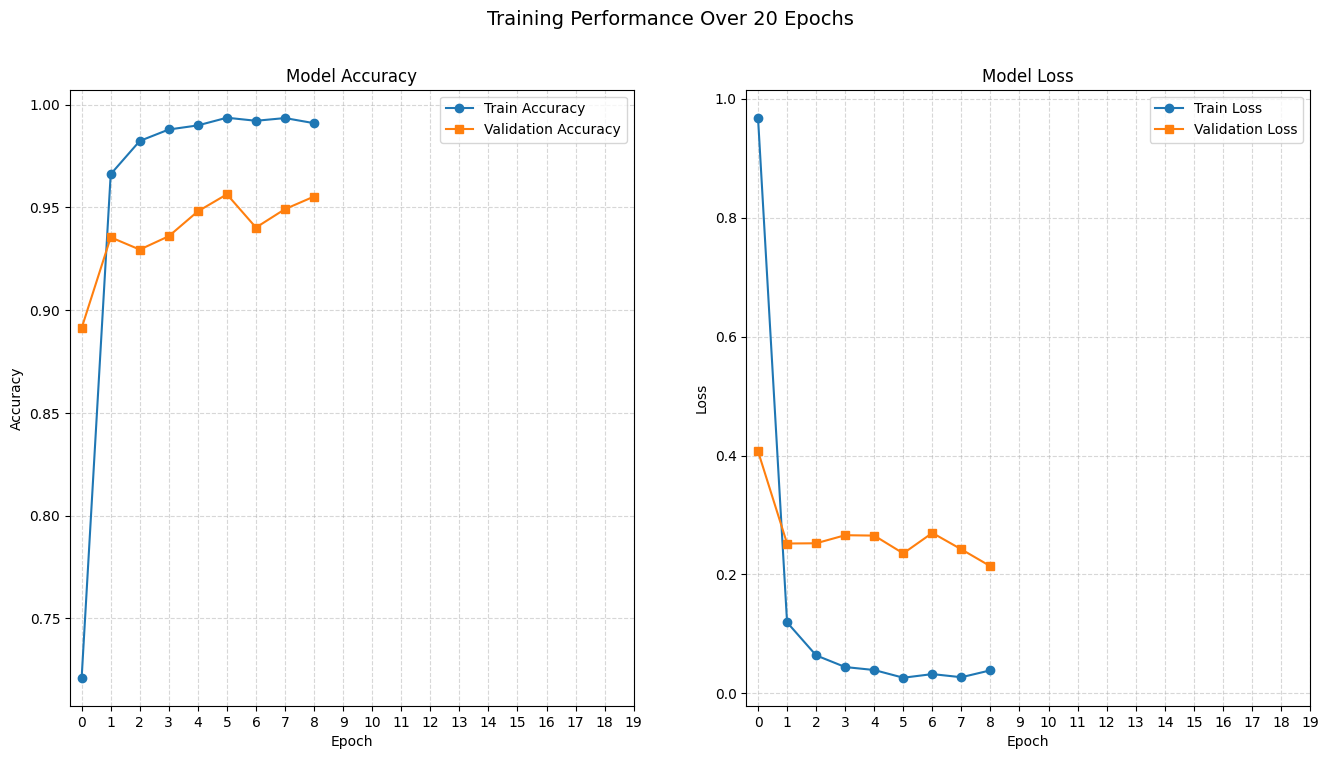

In [53]:
# Define models
models = {
    'VGG19': vgg19_model(input_shape, num_classes),
}

# Train each model
for model_name, model in models.items():
    print(f"\nTraining model: {model_name}")

    # Train and visualize results
    train_and_visualize(model, x_train, y_train, x_test, y_test)


Training model: VGG19
Epoch 1/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 28s 48ms/step - accuracy: 0.9904 - loss: 0.0438 - val_accuracy: 0.9556 - val_loss: 0.2337
Epoch 2/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9939 - loss: 0.0248 - val_accuracy: 0.9464 - val_loss: 0.2815
Epoch 3/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9962 - loss: 0.0201 - val_accuracy: 0.9628 - val_loss: 0.1591
Epoch 4/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9950 - loss: 0.0229 - val_accuracy: 0.9414 - val_loss: 0.2808
Epoch 5/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9960 - loss: 0.0176 - val_accuracy: 0.9668 - val_loss: 0.2457
Epoch 6/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9976 - loss: 0.0119 - val_accuracy: 0.9554 - val_loss: 0.3175
Epoch 7/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9942 - loss: 0.0287 - val_accuracy: 0.9629 - val_loss: 0.2329
Epoch 8/20
420/420 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,500,291 (230.79 MB)

 Trainable params: 20,166,763 (76.93 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,333,528 (153.86 MB)

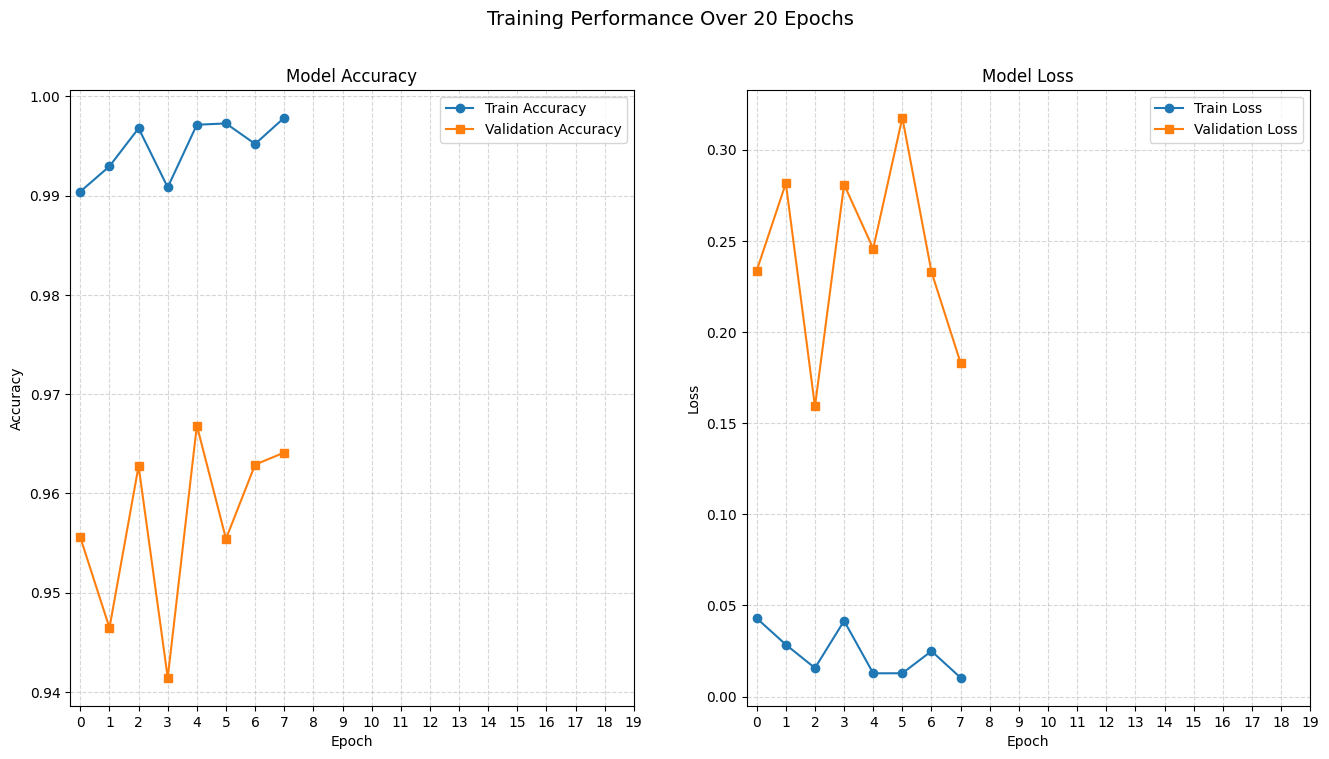

✅ VGG19 model saved as VGG19.h5


In [54]:
from tensorflow.keras.models import load_model

# Train and Save the VGG19 Model Only As it was the highest performing model
for model_name, model in models.items():
    print(f"\nTraining model: {model_name}")

    # Train and visualize results
    train_and_visualize(model, x_train, y_train, x_test, y_test)

    # Save only the VGG19 model
    if model_name == 'VGG19':
        model.save(f"{model_name}.h5")  # Save in HDF5 format
        print(f"✅ {model_name} model saved as {model_name}.h5")